### Sentiment Analysis

**◆ Uses of Sentiment Analysis**

- It is necessary to analyze the emotions and sentiments contained in the text using machines without bias.
- Spam or malicious messages can be extracted and removed.
- A chatbot can analyze the emotional level of a message sent by a human and create a human-like response corresponding to it.

**◆ Sentiment analysis approach**

The following two methods are used

(1) using human-written rule-based algorithms; It is based on a dictionary (lexicon) containing pairs of specific words and sentiment scores, and the VADER algorithm ( Scikit Learn ) has exist

(2) using machine learning models where computers learn directly from data; Create rules by training a machine learning model using a set of sentences or documents with

#### 1. English Emotional Glossary

1. AFINN: assigns a score between -5 and 5 (positive/ negative)
2. Bing : positive / negative of words in binary format classification
3. NRC: 10 types emotion Use a glossary of terms
    {fear, anger, anticipation, trust, surprise, positive, negative, sadness, disgust, joy}
    http://jonathansoma.com/lede/algorithms-2017/classes/more-text-analysis/nrc-emotional-lexicon/
4. VADER : Score calculation for ( negative+neutral+positive =1)
    ( https://towardsdatascience.com/religion-on-twitter-5f7b84062304 )
    The compound score is computed by summing the valence scores of each word in the lexicon, adjusted according to the rules, and then normalized to be between -1 (most extreme negative) and +1 (most extreme positive).
   
    **▪ Typical threshold values:**
   
    - positive sentiment: compound score >= 0.05
   
    - neutral sentiment: (compound score > -0.05) and (compound score < 0.05)
   
    - negative sentiment: compound score <= -0.05
   
5. SentiWordNet : SentiWordNet assigns to each synset of WordNet three sentiment scores: positivity, negativity, objectivity. https://github.com/aesuli/SentiWordNet

6. TextBlob : It provides common NLP tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more. ( https://textblob.readthedocs.io/en/dev/ )

    Negative : polatiry [-1 to 1]
   
    Subjectivity : subjectivity [objective:0 ~subjective:1]
   
7. SentimentR

#### 2. Emotional terms in Korean dictionary

For Korean, a free downloadable glossary is available. Incomplete. the Korean-ko-NRC-Emotion-Intensity-Lexicon-v1.txt file from google Applying the English sentiment analysis method using a translator is one method.

**1. IMDB movie review download and sentiment analysis (Using the glossary)**

In [1]:
import pandas as pd
import nltk
from afinn import afinn
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.tokenize import RegexpTokenizer
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/junghunlee/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
review = pd.read_csv('../../Data/IMDBDataset.csv')
review.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**2. AFINN Lexicon**

Calculate sentiment score using AFINN glossary(AFINN: consists of -5 to 5 points for each word)

In [6]:
afinn_ = afinn.Afinn()
pos_review = review['review'][1] # Print only one positive sentence
neg_review = review['review'][3] # print only one negative sentence
print(afinn_.score(pos_review))
print(afinn_.score(neg_review))

13.0
-8.0


In [7]:
afn = afinn.Afinn(emoticons = True)

In [9]:
# Parse only the first n sentences
n = 100
index = []
for row in review['review'][0:n] :
    index.append(row)
print(len(index), 'Predicted Sentiment Polarity : ', afn.score(row))

100 Predicted Sentiment Polarity :  41.0


**3. NRC Vocabulary**

Sentiment classification using NRC terminology (NRC: classifying each word into 10 sentiments)

In [10]:
nrc = pd.read_csv('../../Data/NRC-Emotion-Lexicon-Wordlevel-v0.92.txt', engine = "python", header = None, sep = "\t")
nrc.head()

,0,1,2
0,aback,anger,0
1,aback,anticipation,0
2,aback,disgust,0
3,aback,fear,0
4,aback,joy,0


In [11]:
nrc = nrc[(nrc != 0).all(1)]
nrc.head(10)

,0,1,2
19,abacus,trust,1
23,abandon,fear,1
25,abandon,negative,1
27,abandon,sadness,1
30,abandoned,anger,1
33,abandoned,fear,1
35,abandoned,negative,1
37,abandoned,sadness,1
40,abandonment,anger,1
43,abandonment,fear,1


Column 0 : ( Applicable word ), Column 1 : (10 sentiments ), Column 2 : ( Applicable )

Example ) abacus corresponds to the emotion of trust, and abadon corresponds to the three types of fear, negative, and sadness

In [12]:
# reset index number
nrc = nrc.reset_index(drop = True)
nrc.head()

,0,1,2
0,abacus,trust,1
1,abandon,fear,1
2,abandon,negative,1
3,abandon,sadness,1
4,abandoned,anger,1


In [14]:
list(nrc[0][:5])

['abacus', 'abandon', 'abandon', 'abandon', 'abandoned']

Sentiment analysis using NRC for a specific sentence 1

In [15]:
tokenizer = RegexpTokenizer('[\w]+')
stop_words = stopwords.words('english')
p_stemmer = PorterStemmer()

In [16]:
raw = pos_review.lower() # the sentence you want to analyze
tokens = tokenizer.tokenize(raw)
stopped_tokens = [i for i in tokens if not i in stop_words] # remove stop words
match_words = [x for x in stopped_tokens if x in list(nrc[0])] # match with dictionary

In [17]:
emotion = []
for i in match_words :
    temp = list(nrc.iloc[np.where(nrc[0] == i)[0], 1])
    for j in temp :
        emotion.append(j)

positive        14
trust            4
anticipation     3
joy              2
fear             2
surprise         1
disgust          1
negative         1
sadness          1
Name: count, dtype: int64 Axes(0.125,0.11;0.775x0.77)


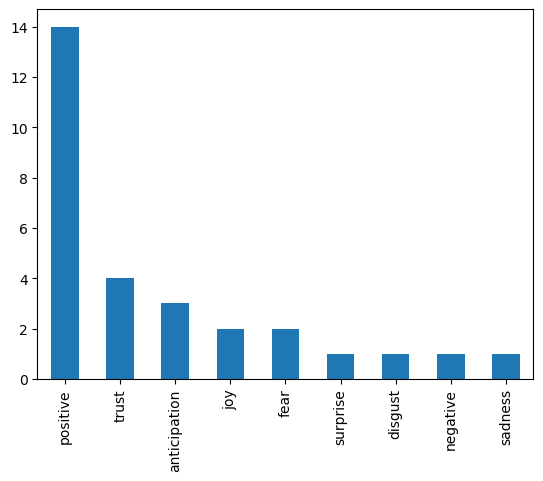

In [18]:
sentiment_result1 = pd.Series(emotion).value_counts()
print(sentiment_result1, sentiment_result1.plot.bar())